# irisデータセットを使った分類問題：ハードマージン
まず事前準備

In [19]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


iris.feature_namesに各々のカラム名が格納されているので、それをpandasのDataframeの引数に渡すことで上のようなデータを出力できます。

Sepal Lengthはがく弁の長さが、Sepal Widthにはがく弁の幅が、Petal lengthには花びらの長さが、Petal Widthには花びらの幅のデータが格納されています。

以下のようにすれ正解ラベルを表示できます。

In [25]:
print(iris.target)

#アヤメの品種であるsetosa、versicolor、virginicaをそれぞれ0, 1, 2としています。

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [26]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
import mglearn

iris = load_iris()
X = iris.data[:100, 2:]
Y = iris.target[:100]
print(X.shape)
print(Y.shape)

#今回はsetosa、versicolorのpetal lengthとpetal widthのデータを用いて分類を行います。

(100, 2)
(100,)


データの描画。
線形分離可能な問題であることがわかる

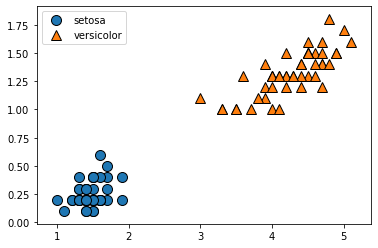

In [22]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], Y)
plt.legend(['setosa', 'versicolor'], loc='best')
plt.show()

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, random_state=0)
svm = LinearSVC()
svm.fit(X_train, Y_train)

#これでモデルの実装は完了

LinearSVC()

以下のコードでどのような描画になったかを確認

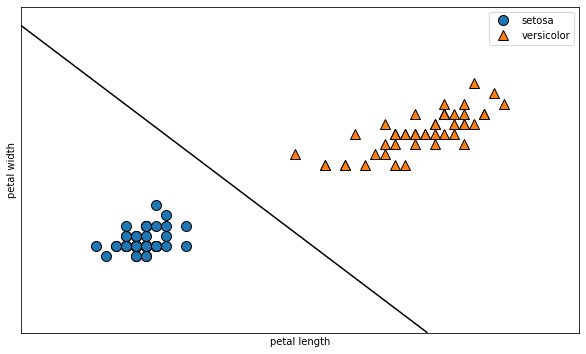

In [28]:
plt.figure(figsize=(10, 6))
mglearn.plots.plot_2d_separator(svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], Y)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(['setosa', 'versicolor'], loc='best')
plt.show()

# irisデータセットを使った分類問題：ソフトマージン
同じく事前準備

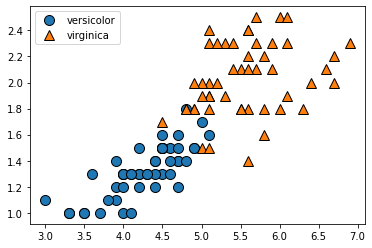

In [29]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
import mglearn

iris = load_iris()

X = iris.data[50:, 2:]
Y = iris.target[50:] - 1

mglearn.discrete_scatter(X[:, 0], X[:, 1], Y)
plt.legend(['versicolor', 'virginica'], loc='best')
plt.show()

今度はversicolorとverginicaのpetal lengthとpetal widthについてのデータをプロットしています。


線形分離不可能な問題であることがわかる

In [30]:
def make_separate(model):
    mglearn.plots.plot_2d_separator(svm, X)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], Y)
    plt.xlabel('petal length')
    plt.ylabel('petal width')
    plt.legend(['setosa', 'versicolor'], loc='best')
    plt.show()

Cの値はソフトマージンにおけるスラック変数。skleaarnにおいて、デフォルトで1.0になっています。

この数値を変化させて、図がどう変わるのか確認してみましょう。
以下のコードで、引数に与えたモデルの境界線をプロットする関数を定義します。

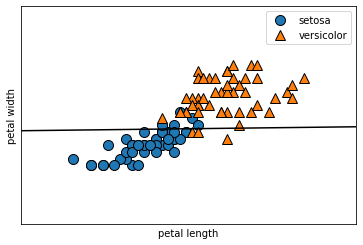

0.96


In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, random_state=0)
svm = LinearSVC(C=0.1)
#Cを1.0から0.1に変更
svm.fit(X_train, Y_train)
make_separate(svm)

print(svm.score(X_test, Y_test))

0.1では上記のようになりました。C=1.0場合を確認してみましょう

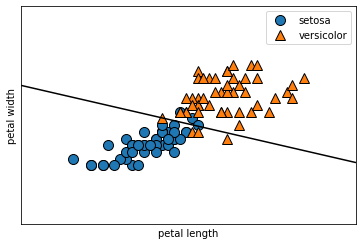

1.0


In [33]:
svm = LinearSVC(C=1.0)
#Cを0.1から1.0に変更
svm.fit(X_train, Y_train)
make_separate(svm)
print(svm.score(X_test, Y_test))

では、C=100のどうでしょうか

/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


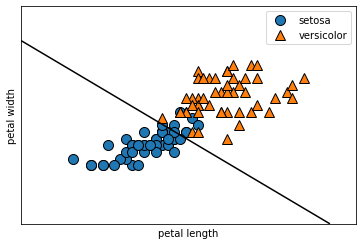

0.96


In [35]:
svm = LinearSVC(C=100)
#Cを1.0から100.0に変更
svm.fit(X_train, Y_train)
make_separate(svm)
print(svm.score(X_test, Y_test))

# カーネル法(RBFカーネル)を使った分類問題
事前準備

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

moons = make_moons(n_samples=300, noise=0.2, random_state=0)

X = moons[0]
Y = moons[1]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, random_state=0)

In [54]:
factor = .2
n_samples = 50
linspace = np.linspace(0, 2 * np.pi, n_samples // 2 + 1)[:-1]
outer_circ_x = np.cos(linspace)
outer_circ_y = np.sin(linspace)
inner_circ_x = outer_circ_x * factor
inner_circ_y = outer_circ_y * factor

X = np.vstack((np.append(outer_circ_x, inner_circ_x),
               np.append(outer_circ_y, inner_circ_y))).T
y = np.hstack([np.zeros(n_samples // 2, dtype=np.intp),
               np.ones(n_samples // 2, dtype=np.intp)])
X += np.random.normal(scale=0.15, size=X.shape)
x_train = X
y_train = y


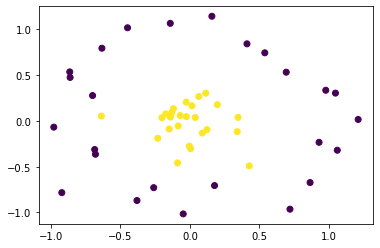

In [55]:
plt.scatter(x_train[:,0], x_train[:,1], c=y_train)

元のデータ空間では線形分離不可能
RBFカーネル（ガウシアンカーネル）で分類してみる

In [56]:
def rbf(u, v):
        sigma = 0.8
        return np.exp(-0.5 * ((u - v)**2).sum() / sigma**2)
    
X_train = x_train
t = np.where(y_train == 1.0, 1.0, -1.0)

n_samples = len(X_train)
# RBFカーネル
K = np.zeros((n_samples, n_samples))
for i in range(n_samples):
    for j in range(n_samples):
        K[i, j] = rbf(X_train[i], X_train[j])

eta1 = 0.01
eta2 = 0.001
n_iter = 5000

H = np.outer(t, t) * K

a = np.ones(n_samples)
for _ in range(n_iter):
    grad = 1 - H.dot(a)
    a += eta1 * grad
    a -= eta2 * a.dot(t) * t
    a = np.where(a > 0, a, 0)

精度評価

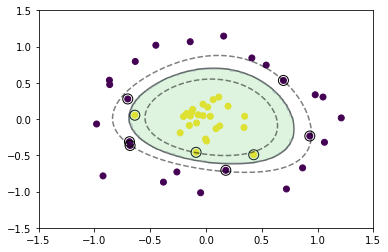

In [57]:
index = a > 1e-6
support_vectors = X_train[index]
support_vector_t = t[index]
support_vector_a = a[index]

term2 = K[index][:, index].dot(support_vector_a * support_vector_t)
b = (support_vector_t - term2).mean()

xx0, xx1 = np.meshgrid(np.linspace(-1.5, 1.5, 100), np.linspace(-1.5, 1.5, 100))
xx = np.array([xx0, xx1]).reshape(2, -1).T

X_test = xx
y_project = np.ones(len(X_test)) * b
for i in range(len(X_test)):
    for a, sv_t, sv in zip(support_vector_a, support_vector_t, support_vectors):
        y_project[i] += a * sv_t * rbf(X_test[i], sv)
y_pred = np.sign(y_project)

# 訓練データを可視化
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
# サポートベクトルを可視化
plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
                    s=100, facecolors='none', edgecolors='k')
# 領域を可視化
plt.contourf(xx0, xx1, y_pred.reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))
# マージンと決定境界を可視化
plt.contour(xx0, xx1, y_project.reshape(100, 100), colors='k',
                     levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])